# Week 5

Phew. You've handed in the assignment. But there's not resting now. We're just hitting out grove, so let's get going!! Much to get through today.

## The plan for today

We continue learning about dataviz by focusing on data with two variables and their relationships. The lecture today has the following parts:
* In part 1, more lecturing on visualization and encodings.
* In part 2, we talk about exploring data with two variables, make some logarithmic plots and think about what we have read in DAOST.
* In part 3, we get a lightning intro to machine learning and the awesome package sklearn
* And finally, in part 4, we use sklearn and have fun with linear regression.

Ok. Now it's time to get started.

## Part 1: More lecturing on dataviz

So now we start learning more about the theory of visualization, digging into data encodings and representations.

[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/zE6Nr8trdrw/0.jpg)](https://www.youtube.com/watch?v=zE6Nr8trdrw)

*Excercise 1:* Some questions about the video
>
> * Mention 10 examples of ways we can encode data.

Histograms, bar plots, cloropleth map, heatmaps, pie chart, line graph, scatter plot, tree structures, network graph, box plots

> * Are all encodings created equally? Why not? Can you think of an example from the previous lectures?

Some encodings are better suited for the human brain - bar plots vs pie charts, for example.

> * Mention 3 encodings that are difficult for the human eye to parse. Can you find an example of a visualization online that uses one of those three?

Area, color, angles

> * Explain in your own words: What is the problem with pie-charts?

It is very difficult once the areas of the categories are not vastly different. I need to guesstimate the size of each category/color and compare it with all the others, which is especially hard with 4+ categories or when we need to judge if its the n'th largest category.

## Part 2: Exploratory data visualzation, two variables  

I told you how I love the Data Analysis with Open Source Tools book. You had to read Chapter 3, which is about visualizing data with two variables, before coming to class today. If you haven't yet, this is the time to do it! 

*Reading*: DAOST Chapter 3 up to *Graphical Analysis and Presentation Graphics* on page 68 in the PDF. **You will have to go and get it on DTU Learn due to the copyright stuff**.

And now a few exercises to reflect on the text:

*Exercise 2.1:* Questions from DAOST Chapter 3.

> * Looking at Fig 3-1, Janert writes "the data itself shows clearly that the amount of random noise in the data is small". What do you think his argument is?

There might be consistent errors in the data - e.g. all samples are offset by two. But as the pattern/relation between x and y is very clear and consistent with no deviations, it can be argued that the random noise is limited.

> * Can you think of a real-world example of a multivariate relationship like the one in Fig 3-3 (lower right panel)?

Not right now..

> * What are the two methods Janert metions for smoothing noisy data? Can you think of other ones?

She mentions LOESS and splines. Other options could be a moving average or various filters such as kalman, low- or high-pass filters. 

> * What are residuals? Why is it a good idea to plot the residuals of your fit?

Residuals are the errors found when subtracting the actual data from the estimated data from e.g. a smoothing or regression model. Plotting the residual can show whether they exhibit the behaviour expected for the given model - e.g. if they are not normally distributed, the model may not explain all the trends in the data correctly.

> * Explain in your own words the point of the smooth tube in figure 3-7.

If the width of the smooth tube varies, that means that the residuals are not identically distributed across all estimated/smoothed values by the model.

> * What the h#ll is banking and what part of our visual system does it use to help us see patterns? What are potential problems with banking?

Banking aims to make the slopes in graphs roughly 45 degrees, as our visual system detects changes on slopes at that degree the best The issue with banking is that it alters the aspect ratio of graphs and thus the plots may become very visually disappealing or create comparison issues. 

> * Summarize the discussion of Graphical Analysis and Presentation Graphics on pp. 68-69 in your own words.

Graphical analysis is all about investigating data, exploring relationships, trends, patterns in the data. The plots made in this process should not be polished unless absolutely necessary - as once you starting prettifying a plot, you are more reluctanct to keep exploring. Presentation graphics needs to be very polished, and include all necessary labels, colors, details needed to make the plot understandable on its very own.

Ok. Let's briefly talk about logarithms and logarithimic plots (if you take my networks class in the fall semester you'll se lots of loglog plots since they're important for understanding a key property of networks).

*Exercise 2.2*: Logarithms and logarithmic plots. 

> * First, a couple of questions:
>    * What kind of relationships will a semi-log plot help you discover?

Exponential relationship between variables.

>    * What kind of functions will loglog plots help you see?

Power-law relationships between variables.

> * Second, we are going to create a version of [this plot](https://github.com/suneman/socialdata2022/blob/main/files/CrimeOccurrencesByCategory.png) from Week 1, where you display the $y$-axis on log-scale. 

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12,6)})

from datetime import timedelta

In [23]:
df = pd.read_csv('data/crimedata.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

df = df[df['Year'] != '2018']

df['Datetime'] = df['Date'].dt.strftime('%Y-%m-%d')
df['Datetime'] = df['Datetime'] + ' ' + df['Time']
df['Datetime'] = pd.to_datetime(df['Datetime'])

df = df[(df.Y < 50) & (df.X<-122)]

df_theft = df[df['Category'] == 'LARCENY/THEFT']

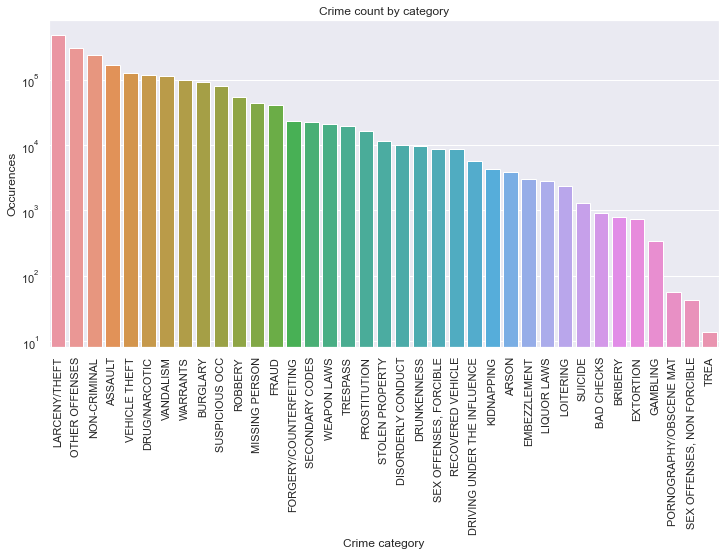

In [24]:
plt.xticks(rotation=90)
plt.title("Crime count by category")

ax = sns.countplot(x='Category', data=df, order = df['Category'].value_counts().index)
ax.set(xlabel='Crime category', ylabel='Occurences', yscale='log');

> * Third, let's also try a loglog plot. Inspired by [this article](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0183110) I would expect that especially theft could be characterized by a power law distribution also in San Francisco. Let's see if I'm right. 
>   - *Step 1:* Divide San Francisco into a grid **roughly** $100m \times 100m$. You can, for example use numpy to do this, I would call `np.histogram2d`, and searching the internet, it seems that there are also [ways to do this in pandas](https://stackoverflow.com/questions/39254704/pandas-group-bins-of-data-per-longitude-latitude). The earth isn't flat,so `lat,` `lon` aren't really squares, but it is OK to ignore. 
>       * **Hint 1**. I really mean approximately 100 meters. It can also be 200 meters. Or 80 meters. Or 300.
>       * **Hint 2**. Ignore outliers. We only want points that are on the SF peninsula
>       * **Hint 3**. We've made a little example of how you can do the binning. Get it [here](https://github.com/suneman/socialdata2022/blob/main/lectures/Week5_binning.ipynb).
>   - *Step 2:* Count the number of thefts occurring within each grid-square (use all data for all time).
>   - *Step 3:* Tally the counts. Count the number of squares with $k=0$ thefts. We call this $N(0)$. Next, count the number of grids with one crime to get $N(k=1)$. Keep going like this all the way up to $k=C_{max}$, where $C_{max}$ is the highest count of crimes you find in any grid space. 
>     * *Extra tip*: If you want all the details on binning for loglog axes, you can check out [Lecture 2, Part 3](https://github.com/SocialComplexityLab/socialgraphs2021/blob/main/lectures/Week2.ipynb) in my social graphs course.
>   - *Step 4:* Plot the distribution of $k+1$ vs $N(k)$ on linear axes.
>   - *Step 5:* Plot the distribution of $k+1$ vs $N(k)$ on loglog axes.
>   - *Step 6:* Answer the question. Was Sune correct in assuming that there is a power-law distribution of theft?

In [62]:
count, lon, lat = np.histogram2d(df_theft.Y, df_theft.X, bins = [130,125])
count = count.astype(int)
Cmax = np.max(count)

dict_tally = dict()
list_tally = []

for i in range(1,Cmax+1):
    condition = count == i
    # count the elements
    c = np.count_nonzero(condition)
    dict_tally[i] = c
    list_tally.append(c)

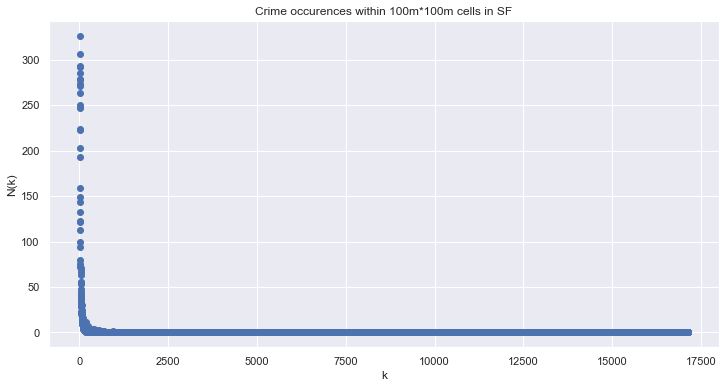

In [71]:
plt.scatter(dict_tally.keys(), dict_tally.values());
plt.title('Crime occurences within 100m*100m cells in SF');
plt.xlabel('k');
plt.ylabel('N(k)');

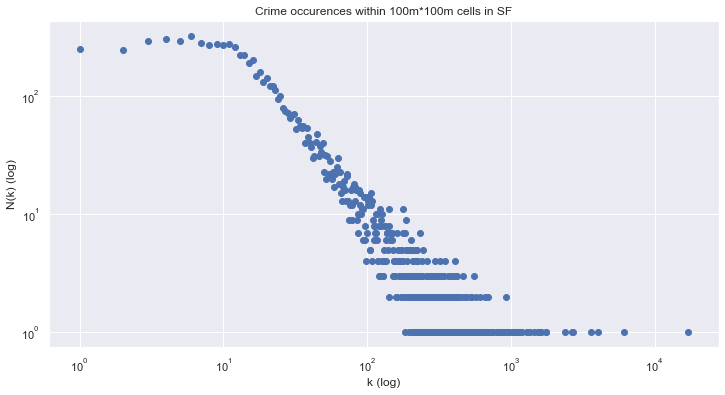

In [73]:
plt.scatter(dict_tally.keys(), dict_tally.values());
plt.title('Crime occurences within 100m*100m cells in SF');
plt.xlabel('k (log)');
plt.ylabel('N(k) (log)');
plt.xscale('log');
plt.yscale('log');

There is a nice power-law distribution as observed in both the plots. The loglog plot has a linear slope throughout the majority of the data range.

## Part 3: Lightning intro to Machine Learning and sklearn

Before we get to linear regression and as we are going to use a bit of Machine Learning in the following lectures too, we are going to have a quick intro to Machine Learning.

We kick off the machine-learning part by watching a video lecture on *What Machine Learning is*. The lecture (and the one in next weeks) have been prepared by our very own expert, Ole Winter, whose work focuses on Machine Learning. The lectures + slides have been prepared especially for you guys by Ole, and lovingly edited by Sune.

**What is machine learning?**
[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/SsCYF9tDY9Y/0.jpg)](https://www.youtube.com/watch?v=SsCYF9tDY9Y)

*Exercise 3.1* We now tie everything together (video, DAOST etc.) by answering a few questions:
> 
> * What are the different categories of Machine Learning? Where does linear regression fall in?

Supervised, unsupervised, semisupervised, reinforcement. Linear regression is supervised, as we are estimating based on known output values.

> * What is the difference between Machine Learning and Statistics? How does this idea connect to the purpose of linear regression according to Janert (DAOST Ch. 3)?

To be answered...

> * I think figure 3-14 (DAOST Ch. 3) makes an important point about linear fits that is rarely made. What is it?

To be answered...

> * What is problematic about using straight lines to fit the data in Fig 3-5? (Something similar is actually the topic of a *Nature* article from 2004 get it [here](https://github.com/suneman/socialdata2022/blob/main/files/regrunners.pdf). And an extra [link](http://www2.imm.dtu.dk/pubdb/views/edoc_download.php/3366/pdf/imm3366.pdf) on this topic for the students who know Danish).

To be answered...

Ok, but how do we apply different machine learning models in practice? 

The amazing package `sklearn` is state-of-the-art machine learning for Python. It's used in companies big and small all over the world and in lots of academic papers.

Today, we start with a high level overview presented in [this tutorial](https://scikit-learn.org/stable/tutorial/basic/tutorial.html). **Try it out**: Read/work through the first three sections (*Machine learning: the problem setting*, *Loading an example dataset*, *Learning and predicting*) to get a sense of data types and syntax.

*Exercise 3.2*: Did you read the text?
>
> * Describe in your own words how data is organized in `sklearn` (how does a *dataset* work according to the tutorial)?
> * What is the dimensionality of the `.data` part of a dataset and what is the size of each dimension?

## Part 4: Linear Regression

So, now it's time for fun with standard linear regression! We'll get into that by asking the following question. 

> *Which pair of focus crimes have the the most similar temporal pattern across the week? (And which pair is most dissimilar).*

Below I list the focus-crimes for your convenience

In [1]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

One way to answer this question is to plot the activity for all pairs of crimetypes as scatter plot per pair. One crime type on each axis, and where each point in the scatter corresponds to an hour of the week, and the number of crimes of crime-type 1 is on the $x$-axis and the number of crimes of crime-type 2 is on the $y$-axis. (So there will be 168 points in each scatterplot.) If we look at 14 focus crimes that results in 91 pairwise comparisons. 

*Exercise 4.1*: Create the 91 scatterplots.
> * Display the plots in a $7$ by $13$ subplot matrix. You can use matplotlib's `subplot` to organize those plots. With $7$ across and $13$ down, you should be able to squeeze them all onto a single [a4](https://en.wikipedia.org/wiki/ISO_216#A_series) page.
>     * Make sure to label each one with the two crime-types you're comparing so we can easily inspect visually.
>     * Make sure that that you squeeze the subplots closely together so each plot can be as big as possible. 
> * Just inspecting this matrix, which crime-types look correlated and which one look like they're very different?

---

Next it's time for the linear regression. Janert writes about this on page 63-66. 

There is a closed-form solution for linear regression. If you want to find the best straight line $y = ax + b$ fit to a set of $N$ points $\{(x_1,y_1), (x_2,y_2), \ldots (x_N,y_N)\}$, the value of $b$ is

$$
\tag{1}
b = \langle y \rangle - a \langle x \rangle,
$$

where $\langle x \rangle = (1/N)\sum_i x_i$ is the mean value of the $x_i$ and $\langle y \rangle = (1/N)\sum_i x_i$ is the mean value of the $y_i$. 

And the value for the slope $a$ is 

$$
\tag{2}
a = \frac{\sum_{i=1}^N \left( x_iy_i \right) - N \langle x\rangle\langle y\rangle }{\sum_{i=1}^N\left( x_i^2 \right) - N\langle x\rangle^2}.
$$


A couple of years ago, Sune actually derived the whole thing. I've taken it out of the notebook. But if you'd like to take a look (it's a fun and instructive little exercise), you can find it **[here](https://github.com/suneman/socialdata2021/blob/main/lectures/LinearRegressionDerived.ipynb)**. 

We are going to focus on the fit for now, but keep in mind what we have learnt so far about the purpose of linear regression! 

*Exercise 4.2:* Linear regression using sklearn.
>
> * Using [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from `sklearn`, compute the slope and intercept for each couple of focus-crimes (from Ex. 4.1) and add a linear fit to each of the 91 scatterplots above.
> * **(Optional but highly recommended)** Using the formulas we derived above (Equation 1 and 2), calculate the slopes for $a$ and $b$ in each case. Compare the results with the ones obtained with sklearn to check that everything is working as expected.
> * **(Optional)** You can add even more information to this plot by coloring each point according to its hour of the week. So create a gradient going from one color to another, and color each point according to the gradient. (So let's say your two colors are red and blue, then the Sunday, midnight to 1am bin will be red and the following Sunday, 11pm - midnight bin will be blue).

---

But the question we started with was "Which pair of focus crimes have the the most similar temporal pattern across the week?". We haven't really answered that yet. So let's calculate one last thing: $R^2$. You probably also remember this one. 

Basically $R^2$ is a measures of how good a linear fit is. You can [read about $R^2$ on wikipedia](https://en.wikipedia.org/wiki/Coefficient_of_determination). 

*Exercise 4.3:* Goodness of fit as a measure of correlation. 
> * Write a little function to calculate $R^2$ alongside each linear fit, and compare it with the one provided by the function `score()` in `sklearn`.
> * **According to the fits and associated $R^2$**, which pair of crimes have the **most similar** temporal pattern. Discuss your finding: Does it make sense? Why?/Why not?
> * According to your fits and associated measure of $R^2$, which pair of crimes have the **most dissimilar** temporal pattern. Discuss your finding: Does it make sense? Why?/Why not?
> * Explain the connection between $R^2$ and the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient).